In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


In [0]:
#mnist dataset -standard machine learning benchmark dataset
#each image is 28x28= 784 pixels grayscale

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train,x_test = x_train/255.0, x_test/255.0 #normalize


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(120, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [0]:
#compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [0]:
r = model.fit(x=x_train,y=y_train,validation_data=(x_test, y_test), epochs=13)

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3043 - accuracy: 0.9117 - val_loss: 0.1367 - val_accuracy: 0.9606
Epoch 2/13
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1473 - accuracy: 0.9562 - val_loss: 0.1009 - val_accuracy: 0.9707
Epoch 3/13
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1113 - accuracy: 0.9658 - val_loss: 0.0919 - val_accuracy: 0.9732
Epoch 4/13
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0917 - accuracy: 0.9722 - val_loss: 0.0835 - val_accuracy: 0.9754
Epoch 5/13
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0775 - accuracy: 0.9764 - val_loss: 0.0742 - val_accuracy: 0.9774
Epoch 6/13
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0693 - accuracy: 0.9778 - val_loss: 0.0727 - val_accuracy: 0.9783
Epoch 7/13
60000/60000 [==============================] 

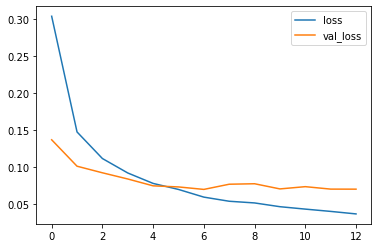

In [0]:
#plot loss
import matplotlib.pyplot as plt

plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

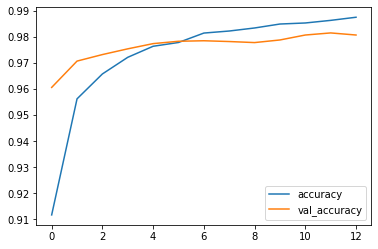

In [0]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [0]:
#valuate
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0697 - accuracy: 0.9807


[0.06971637708962662, 0.9807]

Confusion matrix, without normalization
[[ 972    0    0    2    0    1    2    1    2    0]
 [   0 1125    2    1    0    0    2    1    4    0]
 [   3    3 1010    3    1    0    2    4    6    0]
 [   0    0    4  992    0    2    0    6    4    2]
 [   2    0    2    1  966    0    3    2    1    5]
 [   3    0    0    9    1  872    1    1    4    1]
 [   6    3    1    1    5    4  935    0    3    0]
 [   2    3    8    2    0    1    0 1005    1    6]
 [   7    0    1    2    2    5    2    3  951    1]
 [   2    4    0    6    9    2    0    5    2  979]]


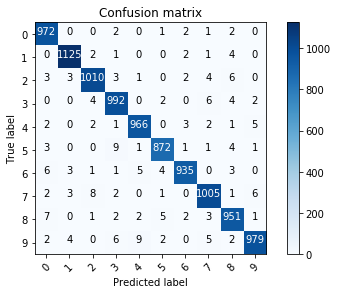

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

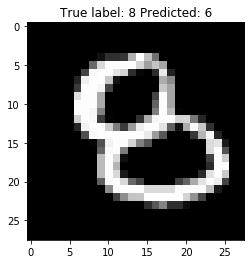

In [0]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));